In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
import seaborn as sns

In [60]:
data = pd.read_csv("./Hotel-Property-Value-Dataset/train.csv")

In [61]:
data

,Id,PropertyClass,ZoningCategory,RoadAccessLength,LandArea,RoadType,ServiceLaneType,PlotShape,LandElevation,UtilityAccess,...,SwimmingPoolArea,PoolQuality,BoundaryFence,ExtraFacility,ExtraFacilityValue,MonthSold,YearSold,DealType,DealCondition,HotelValue
0,775,20,RL,110.0,14226,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,New,Partial,395000.0
1,673,20,RL,NaN,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,165000.0
2,234,20,RL,75.0,10650,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,128200.0
3,427,80,RL,NaN,12800,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,275000.0
4,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432.0
1196,1131,50,RL,65.0,7804,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2009,WD,Normal,135000.0
1197,1295,20,RL,60.0,8172,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,115000.0
1198,861,50,RL,55.0,7642,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,189950.0


In [62]:
data.columns

Index(['Id', 'PropertyClass', 'ZoningCategory', 'RoadAccessLength', 'LandArea',
       'RoadType', 'ServiceLaneType', 'PlotShape', 'LandElevation',
       'UtilityAccess', 'PlotConfiguration', 'LandSlope', 'District',
       'NearbyTransport1', 'NearbyTransport2', 'PropertyType', 'HotelStyle',
       'OverallQuality', 'OverallCondition', 'ConstructionYear',
       'RenovationYear', 'RoofDesign', 'RoofMaterial', 'ExteriorPrimary',
       'ExteriorSecondary', 'FacadeType', 'FacadeArea', 'ExteriorQuality',
       'ExteriorCondition', 'FoundationType', 'BasementHeight',
       'BasementCondition', 'BasementExposure', 'BasementFacilityType1',
       'BasementFacilitySF1', 'BasementFacilityType2', 'BasementFacilitySF2',
       'BasementUnfinishedSF', 'BasementTotalSF', 'HeatingType',
       'HeatingQuality', 'CentralAC', 'ElectricalSystem', 'GroundFloorArea',
       'UpperFloorArea', 'LowQualityArea', 'UsableArea', 'BasementFullBaths',
       'BasementHalfBaths', 'FullBaths', 'HalfBaths', 'G

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 81 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1200 non-null   int64  
 1   PropertyClass            1200 non-null   int64  
 2   ZoningCategory           1200 non-null   object 
 3   RoadAccessLength         977 non-null    float64
 4   LandArea                 1200 non-null   int64  
 5   RoadType                 1200 non-null   object 
 6   ServiceLaneType          75 non-null     object 
 7   PlotShape                1200 non-null   object 
 8   LandElevation            1200 non-null   object 
 9   UtilityAccess            1200 non-null   object 
 10  PlotConfiguration        1200 non-null   object 
 11  LandSlope                1200 non-null   object 
 12  District                 1200 non-null   object 
 13  NearbyTransport1         1200 non-null   object 
 14  NearbyTransport2        

In [64]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"{i}: {data[i].isnull().sum()} missing values. Data type: {data[i].dtype}")

RoadAccessLength: 223 missing values. Data type: float64
ServiceLaneType: 1125 missing values. Data type: object
FacadeType: 702 missing values. Data type: object
FacadeArea: 7 missing values. Data type: float64
BasementHeight: 29 missing values. Data type: object
BasementCondition: 29 missing values. Data type: object
BasementExposure: 30 missing values. Data type: object
BasementFacilityType1: 29 missing values. Data type: object
BasementFacilityType2: 29 missing values. Data type: object
ElectricalSystem: 1 missing values. Data type: object
LoungeQuality: 560 missing values. Data type: object
ParkingType: 65 missing values. Data type: object
ParkingConstructionYear: 65 missing values. Data type: float64
ParkingFinish: 65 missing values. Data type: object
ParkingQuality: 65 missing values. Data type: object
ParkingCondition: 65 missing values. Data type: object
PoolQuality: 1194 missing values. Data type: object
BoundaryFence: 963 missing values. Data type: object
ExtraFacility: 1154

I think I will discard the ServiceLaneType, PoolQuality and ExtraFacility columns completely

In [65]:
data.drop(columns=["ServiceLaneType", "PoolQuality", "ExtraFacility", "BoundaryFence"], inplace=True)

In [66]:
cols = [
    "BasementHeight",
    "BasementCondition",
    "BasementExposure",
    "BasementFacilityType1",
    "BasementFacilityType2",
    "ParkingType",
    "ParkingConstructionYear",
    "ParkingFinish",
    "ParkingQuality",
    "ParkingCondition"
]

null_id_map = {c: data.loc[data[c].isnull(), "Id"].tolist() for c in cols}

list_BasementHeight = null_id_map["BasementHeight"]
list_BasementCondition = null_id_map["BasementCondition"]
list_BasementExposure = null_id_map["BasementExposure"]
list_BasementFacilityType1 = null_id_map["BasementFacilityType1"]
list_BasementFacilityType2 = null_id_map["BasementFacilityType2"]

list_ParkingType = null_id_map["ParkingType"]
list_ParkingConstructionYear = null_id_map["ParkingConstructionYear"]
list_ParkingFinish = null_id_map["ParkingFinish"]
list_ParkingQuality = null_id_map["ParkingQuality"]
list_ParkingCondition = null_id_map["ParkingCondition"]



In [67]:
common_ids = set(list_BasementHeight) & set(list_BasementCondition) & set(list_BasementExposure) & set(list_BasementFacilityType1) & set(list_BasementFacilityType2)
print(len(common_ids))

29


So all are from the same row, so we can get rid of 29 data points

In [68]:
common_ids = set(list_ParkingType) & set(list_ParkingConstructionYear) & set(list_ParkingFinish) & set(list_ParkingQuality) & set(list_ParkingCondition)
print(len(common_ids))

65


again, the same rows, so 65 datapoints

Now time to do a cross check

In [69]:
cross_ids = set(list_BasementHeight) & set(list_ParkingType)
print(len(cross_ids))

7


So if we remove null values of both parking data and basement data we will loss a total of 65 + 29 - 7 = 87 rows out of 1200... I guess we can work with it

In [70]:
ids_to_drop = set(list_BasementHeight) | set(list_ParkingType)
print(f"Dropping {len(ids_to_drop)} unique Ids")

# Option A: create a new filtered DataFrame
# data = data[~data["Id"].isin(ids_to_drop)].copy()

# Option B (in-place):
data.drop(index=data[data["Id"].isin(ids_to_drop)].index, inplace=True)

print("New shape:", data.shape)

Dropping 87 unique Ids
New shape: (1113, 77)


In [71]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(f"{i}: {data[i].isnull().sum()} missing values. Data type: {data[i].dtype}")

RoadAccessLength: 210 missing values. Data type: float64
FacadeType: 625 missing values. Data type: object
FacadeArea: 7 missing values. Data type: float64
BasementExposure: 1 missing values. Data type: object
ElectricalSystem: 1 missing values. Data type: object
LoungeQuality: 486 missing values. Data type: object


Can't afford to loose any more data. Need to fill the missing values somehow I guess

In [72]:
numerical_cols = data.select_dtypes(include=['float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [73]:
for col in numerical_cols:
    mean_value = data[col].median()
    data[col].fillna(mean_value, inplace=True)

C:\Users\saanb\AppData\Local\Temp\ipykernel_2424\705254506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mean_value, inplace=True)
C:\Users\saanb\AppData\Local\Temp\ipykernel_2424\705254506.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [74]:
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

c:\Users\saanb\OneDrive\Desktop\ml_assignment_1\ML_ass\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\saanb\OneDrive\Desktop\ml_assignment_1\ML_ass\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


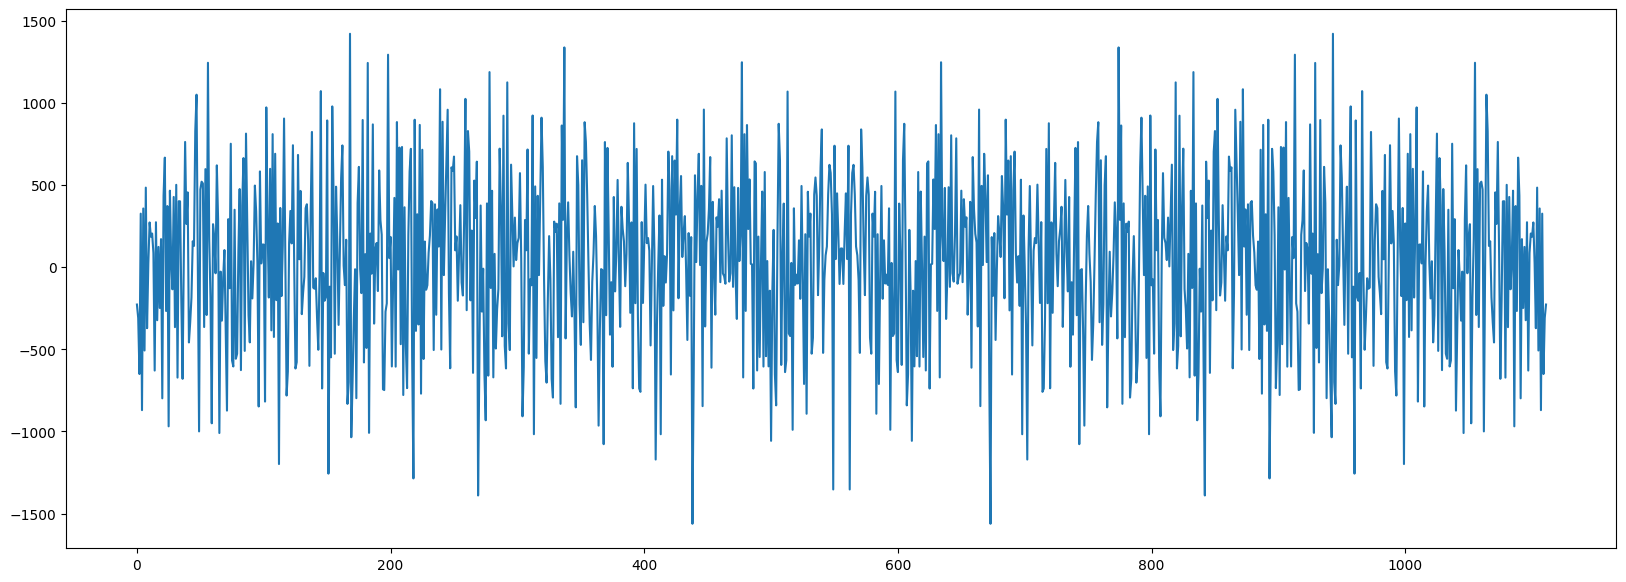

In [75]:
plt.figure(figsize=(20, 7))
fft(data["RoadAccessLength"])
plt.plot(fft(data["RoadAccessLength"])[1::])

Distrubution is spread across a spectrum instead being concentrated. Good!

In [76]:
data.to_csv("./Hotel-Property-Value-Dataset/train_cleaned_diff.csv", index=False)